In [4]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/content/drive/MyDrive/internshala-data-analytics/HealthApp_2k.log_structured.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [6]:
def h():
  return (df.head())

In [7]:
df.describe()

,LineId,Pid
count,2000.000000,2000.0
mean,1000.500000,30002312.0
std,577.494589,0.0
min,1.000000,30002312.0
25%,500.750000,30002312.0
50%,1000.500000,30002312.0
75%,1500.250000,30002312.0
max,2000.000000,30002312.0


In [8]:
time_format = '%Y%m%d-%H:%M:%S:%f'
df['Time'] = pd.to_datetime(df['Time'], format=time_format)
# df['Date'] = df['Time'].dt.date
df['Time'] = df['Time'].apply(lambda x: x.strftime('%Y%m%d-%H:%M'))

In [9]:
df['Time'].value_counts()

20171223-22:15    311
20171223-22:17    239
20171223-22:19    217
20171223-23:14    121
20171223-22:20     96
                 ... 
20171223-23:20      1
20171223-23:18      1
20171223-23:15      1
20171223-23:13      1
20171224-01:02      1
Name: Time, Length: 145, dtype: int64

In [10]:
h()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [11]:
daily_data = df.groupby('Time').agg({'Pid': 'count', 'Content': 'sum'})
daily_data

,Pid,Content
Time,,
20171223-22:15,311,onStandStepChanged 3579onExtend:1514038530000 ...
20171223-22:16,12,processHandleBroadcastAction action:android.in...
20171223-22:17,239,processHandleBroadcastAction action:android.in...
20171223-22:18,33,processHandleBroadcastAction action:android.in...
20171223-22:19,217,processHandleBroadcastAction action:android.in...
...,...,...
20171224-00:58,1,processHandleBroadcastAction action:android.in...
20171224-00:59,1,processHandleBroadcastAction action:android.in...
20171224-01:00,1,processHandleBroadcastAction action:android.in...


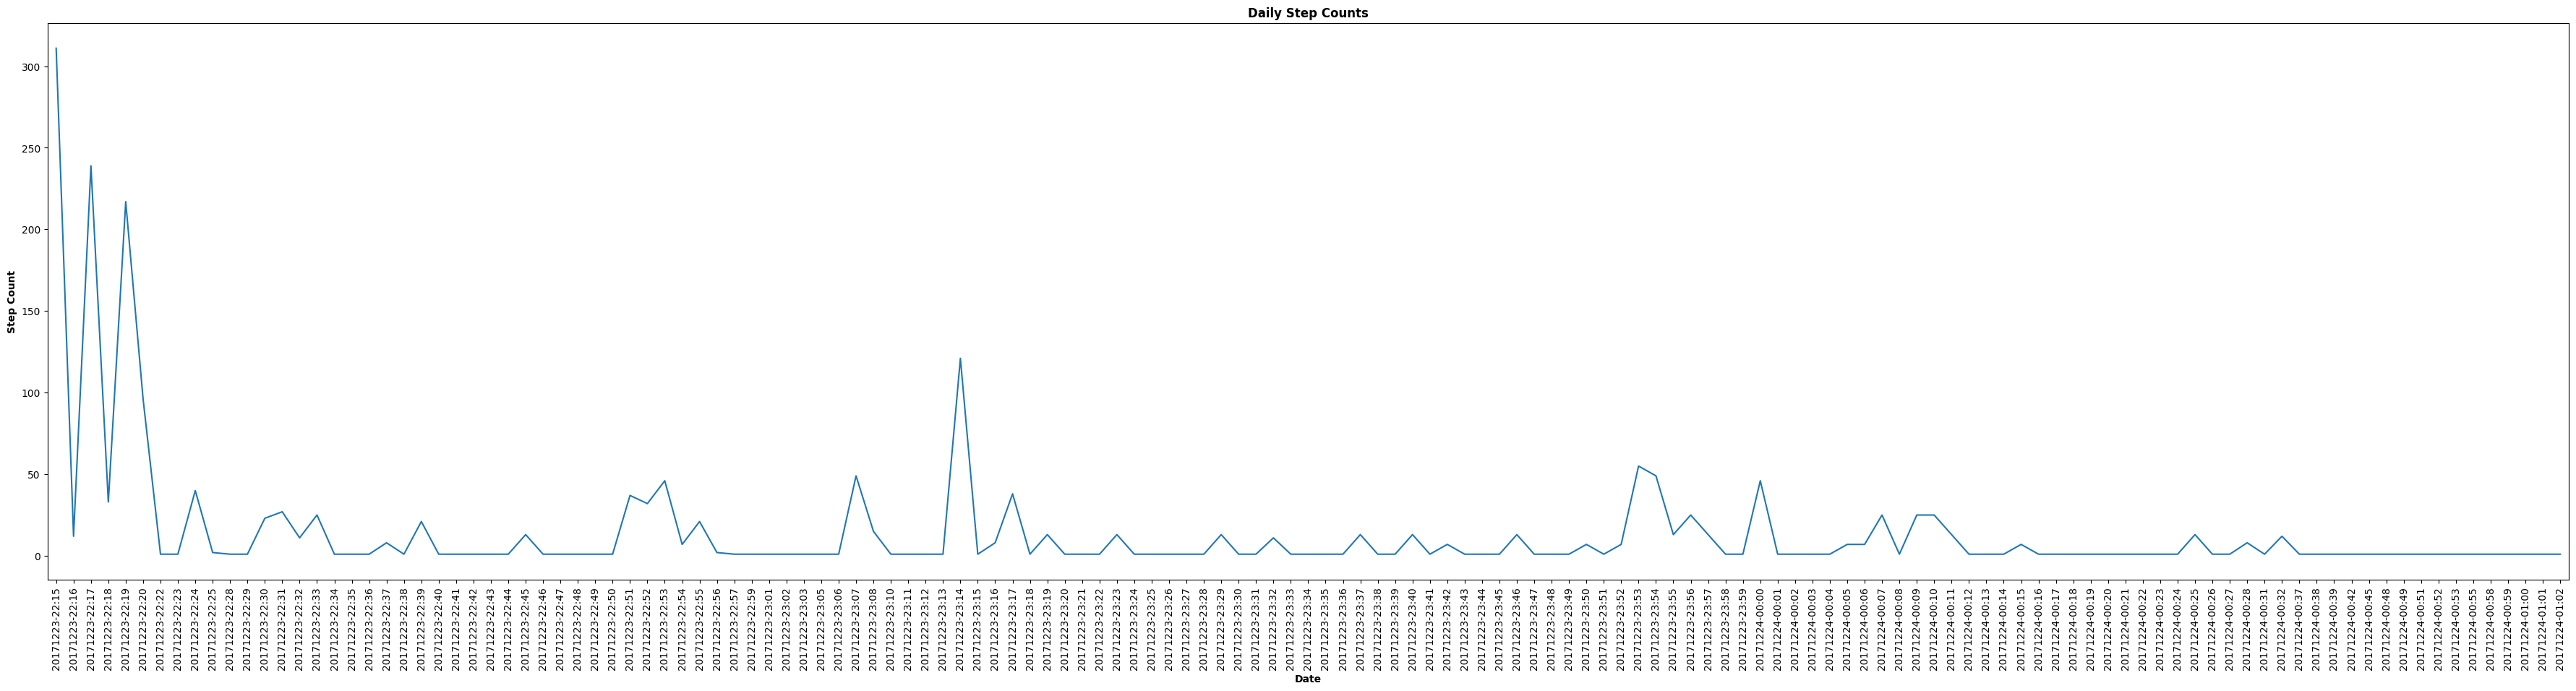

In [12]:
plt.figure(figsize=(45, 10))
plt.plot(daily_data.index, daily_data['Pid'])
plt.title('Daily Step Counts',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Step Count',fontweight='bold')
plt.xticks(rotation = 90)
plt.xlim(left=  -0.5, right = len((daily_data.index))-0.5 )

plt.show()

<ipython-input-13-5eeb16d9f257>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "jet", fmt = '.1f', linewidth = 0.5)


<Axes: >

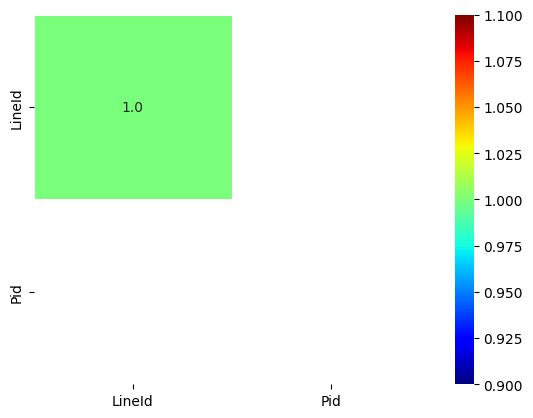

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = "jet", fmt = '.1f', linewidth = 0.5)

In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,LineId,Pid
LineId,1.0,NaN
Pid,NaN,NaN


In [15]:
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [16]:
mydict1 = {'Content' : df['Content'].unique(), 'Count' : df['Content'].value_counts()}
temp1 = pd.DataFrame(mydict1)
temp1 = temp1.reset_index(drop=True)

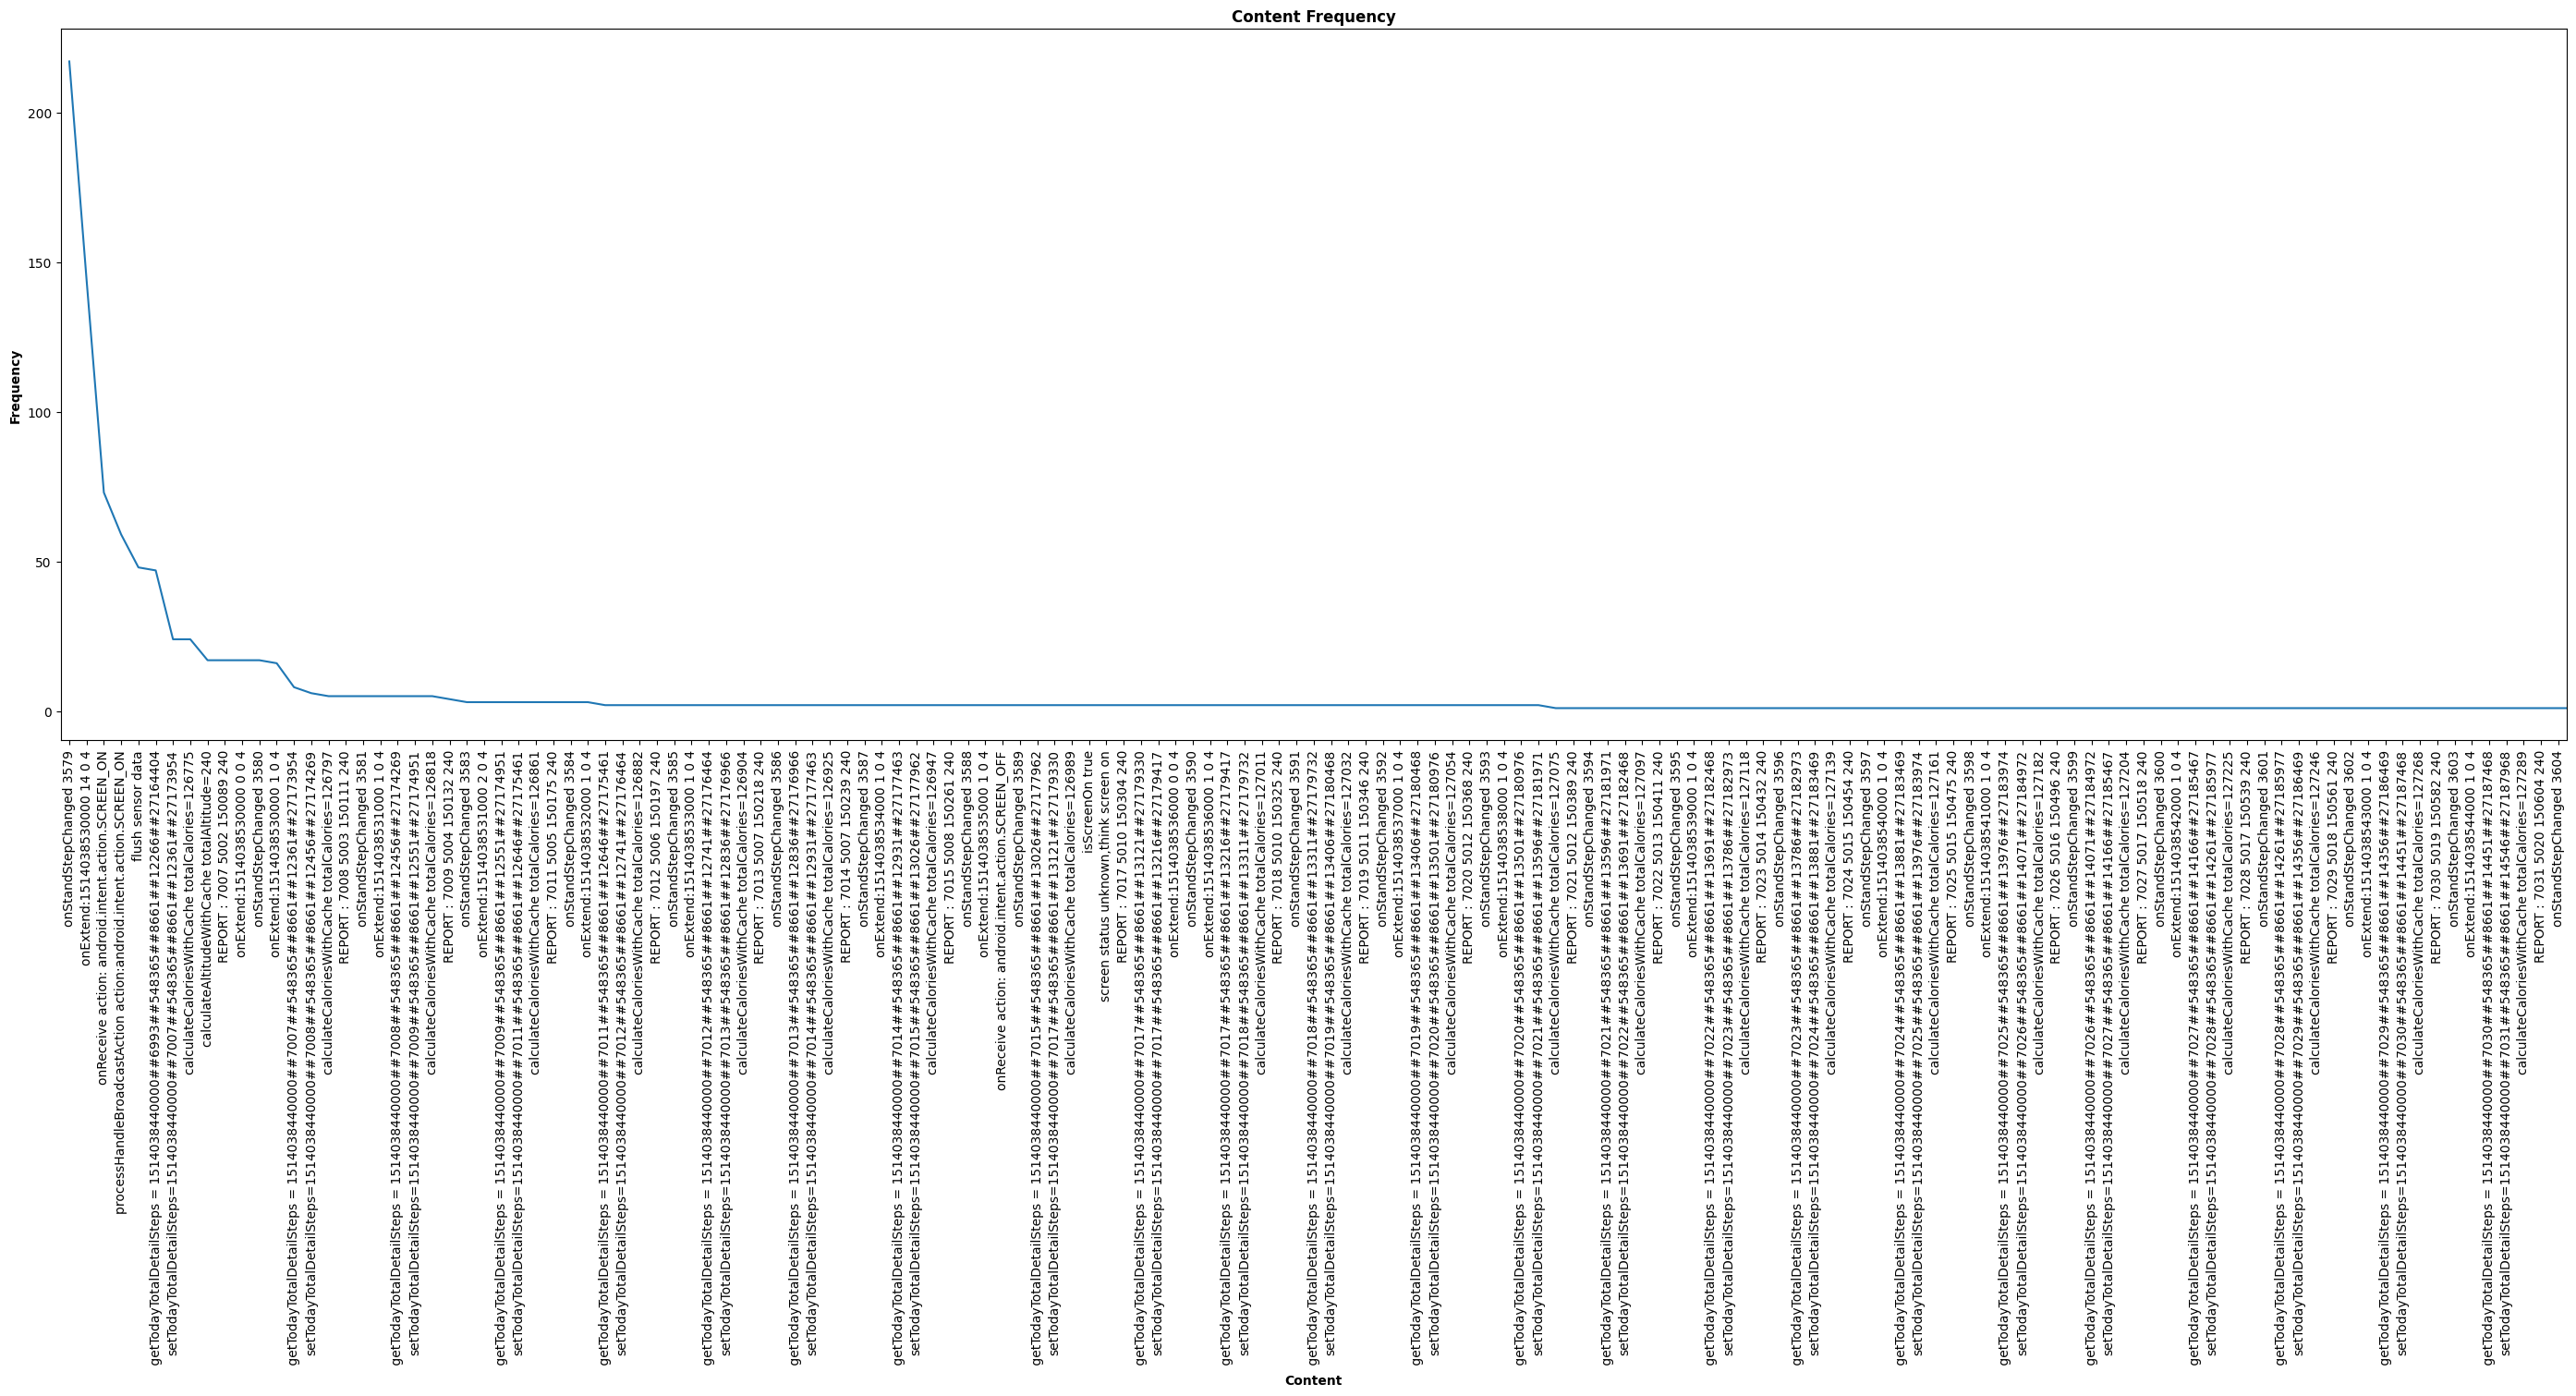

In [17]:
plt.figure(figsize=(35, 10))
plt.plot(temp1['Content'], temp1['Count'])
plt.title('Content Frequency',fontweight='bold')
plt.xlabel('Content',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.xticks(rotation = 90)
plt.xlim(left=  -0.5, right = len(daily_data.index)-0.5 )
plt.grid(False)
plt.show()

In [18]:
value_counts = df['Content'].value_counts()

# Find the index of values that occur only once
values_occuring_once = value_counts[value_counts == 1].index

# Now, 'values_occuring_once' contains the index of values that occur only once
print(len(values_occuring_once))

1093


In [19]:
mydict2 = {'Component' : df['Component'].unique(), 'Count' : df['Component'].value_counts()}
temp2 = pd.DataFrame(mydict2)
temp2 = temp2.reset_index(drop=True)

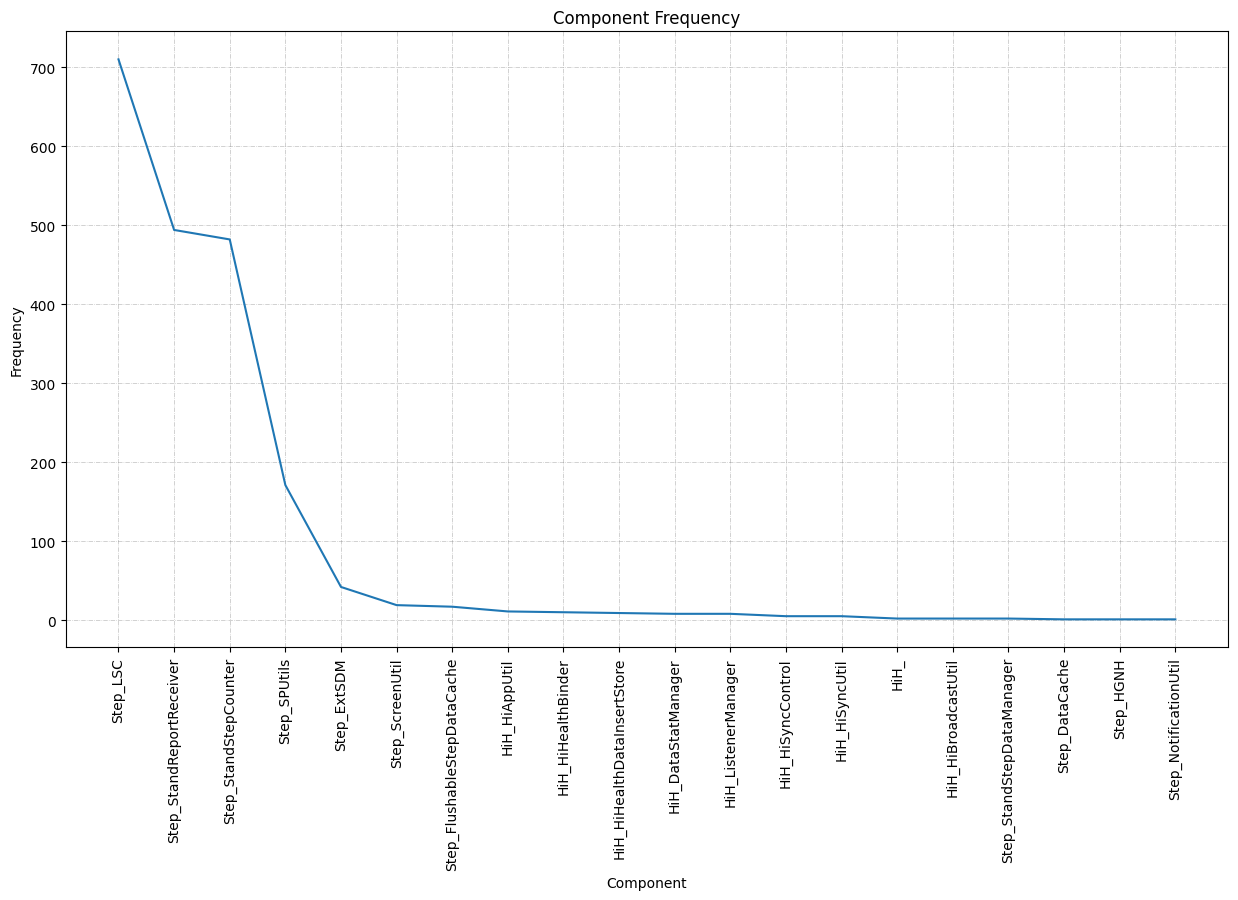

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(temp2['Component'], temp2['Count'])
plt.title('Component Frequency')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
# plt.xlim(left=  -0.5, right = len(daily_data.index)-0.5 )
plt.grid(True, linestyle='dashdot', alpha=0.5, color='gray', linewidth=0.5)
plt.show()

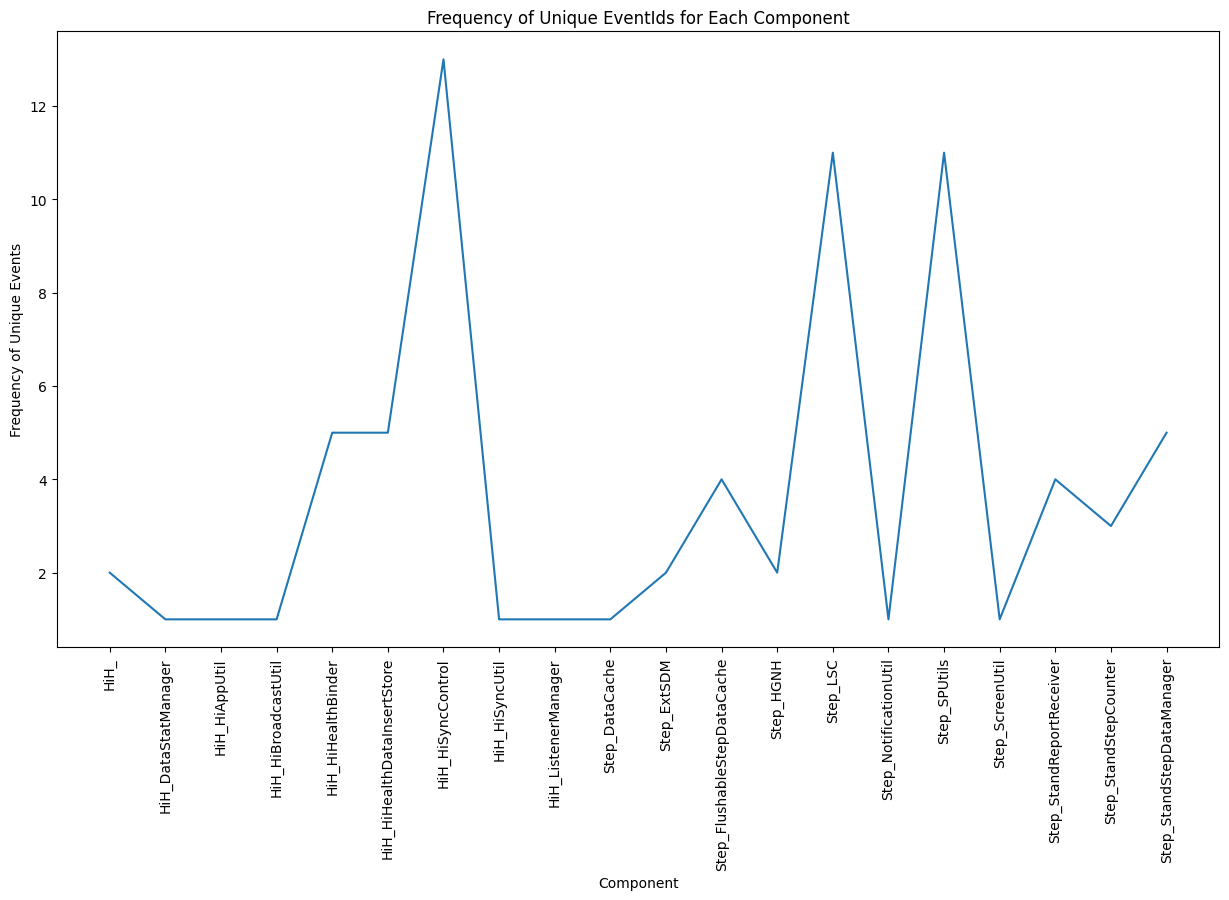

In [21]:
component_eventid_counts = df.groupby('Component')['EventId'].nunique().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(component_eventid_counts['Component'], component_eventid_counts['EventId'])
plt.xlabel('Component')
plt.ylabel('Frequency of Unique Events')
plt.title('Frequency of Unique EventIds for Each Component')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

<ipython-input-33-8cdf3548ec99>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(int)
<ipython-input-33-8cdf3548ec99>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')


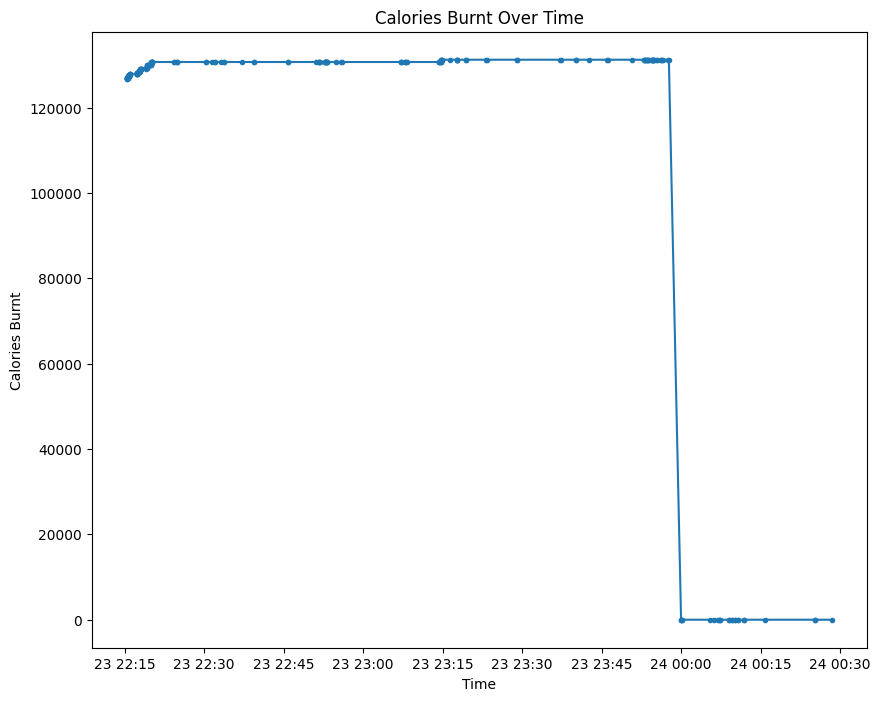

In [33]:
Tdf = pd.read_csv('/content/drive/MyDrive/internshala-data-analytics/HealthApp_2k.log_structured.csv')

# Filter rows containing calories burnt information
calories_df = df[df['Content'].str.contains('calculateCaloriesWithCache')]

# Extract calorie values from the "Content" column
calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)')[0].astype(int)

# Convert the "Time" column to datetime format
calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Create the plot
plt.figure(figsize=(10, 8))
plt.plot(calories_df['Time'], calories_df['Calories Burnt'], marker='.', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Calories Burnt')
plt.title('Calories Burnt Over Time')
plt.grid(False)

# Show the plot
plt.show()